In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

data_info = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
data_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
data_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
data_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
data_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')


# Observing the different tables. 

**Considering movie information, budget, and reviews to understand what their data represents.**

In [2]:
data_movies.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [3]:
data_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [4]:
new_movie = data_info.loc[:,('movie_title','critics_consensus','actors','production_company','tomatometer_status','tomatometer_rating','audience_rating','tomatometer_rotten_critics_count')]

new_movie.head(1)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76


In [5]:
data_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [6]:
data_reviews.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


# Organizing & Cleaning Data

## Merging multiple tables to get more informed data

In [7]:
movie_overview= pd.merge(new_movie,data_budgets,how='inner',left_on='movie_title',right_on='movie')

In [8]:
movie_overview2 = pd.merge(movie_overview,data_movies, how='inner', left_on='movie_title',right_on='title')
movie_overview_columnDrop = movie_overview2.drop(['domestic_gross','movie','genre_ids','original_title','title','original_language','release_date_x','id_x'], axis = 1)
movie_overview_columnDrop


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
4,Going the Distance,NaN,"Christopher Jacot, Shawn Roberts, Ryan Bellevi...",Séville Pictures,Rotten,0.0,61.0,5,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


# Find thost frequently appearing actors in top performing films

# Find the correlation between actors and revenue

In [9]:
example = movie_overview_columnDrop.copy()
example.actors = example.actors.str.split(',')

In [10]:
example = example.explode('actors')

In [11]:
example.columns

Index(['movie_title', 'critics_consensus', 'actors', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'audience_rating',
       'tomatometer_rotten_critics_count', 'production_budget',
       'worldwide_gross', 'id_y', 'popularity', 'release_date_y',
       'vote_average', 'vote_count'],
      dtype='object')

In [12]:
example = example[example.actors.isin(example.actors.value_counts()[:100].index.tolist())]

In [13]:
example = pd.get_dummies(example, columns = ['actors'])

In [14]:
example[example.columns[15:].tolist() + ['worldwide_gross']].corr()

,actors_ Alan Tudyk,actors_ Alexander Flores,actors_ Allison Janney,actors_ Amy Adams,actors_ Ananais J. Dixon,actors_ Anthony Mackie,actors_ April M. Lawrence,actors_ April Winchell,actors_ Beau Knapp,actors_ Ben Kingsley,...,actors_ Victor Williams,actors_ Woody Harrelson,actors_Gbenga Akinnagbe,actors_Jim Parsons,actors_Liam Neeson,actors_Marcia Gay Harden,actors_Mary Rigby-Abernathy,actors_Tom Cruise,actors_Tom Hardy,actors_Yann Arthus-Bertrand
actors_ Alan Tudyk,1.000000,-0.010834,-0.009103,-0.009103,-0.010127,-0.010127,-0.010127,-0.010127,-0.010127,-0.009369,...,-0.010127,-0.010603,-0.010127,-0.010127,-0.009369,-0.010127,-0.010127,-0.009628,-0.009369,-0.010127
actors_ Alexander Flores,-0.010834,1.000000,-0.009512,-0.009512,-0.010582,-0.010582,-0.010582,-0.010582,-0.010582,-0.009790,...,-0.010582,-0.011080,-0.010582,-0.010582,-0.009790,-0.010582,-0.010582,-0.010061,-0.009790,-0.010582
actors_ Allison Janney,-0.009103,-0.009512,1.000000,-0.007992,-0.008892,-0.008892,-0.008892,-0.008892,-0.008892,-0.008226,...,-0.008892,-0.009310,-0.008892,-0.008892,-0.008226,-0.008892,-0.008892,-0.008454,-0.008226,-0.008892
actors_ Amy Adams,-0.009103,-0.009512,-0.007992,1.000000,-0.008892,-0.008892,-0.008892,-0.008892,-0.008892,-0.008226,...,-0.008892,-0.009310,-0.008892,-0.008892,-0.008226,-0.008892,-0.008892,-0.008454,-0.008226,-0.008892
actors_ Ananais J. Dixon,-0.010127,-0.010582,-0.008892,-0.008892,1.000000,-0.009892,-0.009892,-0.009892,-0.009892,-0.009151,...,-0.009892,-0.010357,-0.009892,-0.009892,-0.009151,-0.009892,-0.009892,-0.009404,-0.009151,-0.009892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
actors_Marcia Gay Harden,-0.010127,-0.010582,-0.008892,-0.008892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009151,...,-0.009892,-0.010357,-0.009892,-0.009892,-0.009151,1.000000,-0.009892,-0.009404,-0.009151,-0.009892
actors_Mary Rigby-Abernathy,-0.010127,-0.010582,-0.008892,-0.008892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009151,...,-0.009892,-0.010357,-0.009892,-0.009892,-0.009151,-0.009892,1.000000,-0.009404,-0.009151,-0.009892
actors_Tom Cruise,-0.009628,-0.010061,-0.008454,-0.008454,-0.009404,-0.009404,-0.009404,-0.009404,-0.009404,-0.008701,...,-0.009404,-0.009847,-0.009404,-0.009404,-0.008701,-0.009404,-0.009404,1.000000,-0.008701,-0.009404
actors_Tom Hardy,-0.009369,-0.009790,-0.008226,-0.008226,-0.009151,-0.009151,-0.009151,-0.009151,-0.009151,-0.008467,...,-0.009151,-0.009582,-0.009151,-0.009151,-0.008467,-0.009151,-0.009151,-0.008701,1.000000,-0.009151


## Drop Null Values  - if present 

1. **Observation:**

            Checking how many null values are present.

In [15]:
movie_overview_columnDrop.isnull().sum()

movie_title                           0
critics_consensus                   429
actors                               10
production_company                   18
tomatometer_status                    0
tomatometer_rating                    0
audience_rating                       5
tomatometer_rotten_critics_count      0
production_budget                     0
worldwide_gross                       0
id_y                                  0
popularity                            0
release_date_y                        0
vote_average                          0
vote_count                            0
dtype: int64

2. **Sanity Check:**

           Double checking to ensure that we are not removing more that roughly 1% of our tables when removing 
           duplicates.

In [16]:
cellTotal = np.product(movie_overview_columnDrop.shape)

missing_values_count = movie_overview_columnDrop.isnull().sum()
total_missing = missing_values_count.sum()


percent_missing = (total_missing/cellTotal) * 100
print(percent_missing)

1.232


3. **Remove Rows With Empty Values:**

In [17]:
movie_overview_columnDrop

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
4,Going the Distance,NaN,"Christopher Jacot, Shawn Roberts, Ryan Bellevi...",Séville Pictures,Rotten,0.0,61.0,5,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [18]:
movie_overview_dropNull = movie_overview_columnDrop.dropna()
movie_overview_dropNull

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


## Drop duplicate values - if present 

In [19]:
movie_overview_dropDuplicates = movie_overview_dropNull.drop_duplicates(subset=['movie_title'], keep='last')

Again ensuring that there are no rows without information present

In [20]:
movie_overview_dropDuplicates.isnull().sum()

movie_title                         0
critics_consensus                   0
actors                              0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
audience_rating                     0
tomatometer_rotten_critics_count    0
production_budget                   0
worldwide_gross                     0
id_y                                0
popularity                          0
release_date_y                      0
vote_average                        0
vote_count                          0
dtype: int64

# Checking company and budget

In [21]:
movie_overview_dropDuplicates.head(3)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897


Taking dollar signs and commas out of the wide gross and production columns to ensure that they can be divided as integers and or floats.


In [22]:
movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')


<ipython-input-22-3b2c94b9f95c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
<ipython-input-22-3b2c94b9f95c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
<ipython-input-22-3b2c94b9f95c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character 

In [23]:
movie_overview_dropDuplicates.production_budget = movie_overview_dropDuplicates.production_budget.astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Placing budget on a graph to get low, medium, and high values.** 

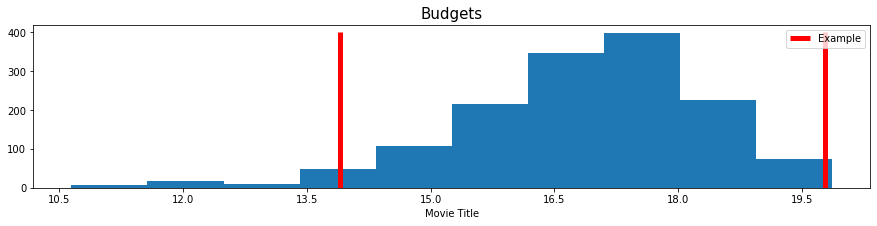

In [24]:
fig, ax = plt.subplots(figsize=(15,3))

frame = movie_overview_dropDuplicates[movie_overview_dropDuplicates.production_budget > 0]
frame['logged_budget'] = np.log(frame.production_budget)
ax.hist(frame.logged_budget)
upper_thresh = frame.logged_budget.mean() + frame.logged_budget.std() * 2
lower_thresh = frame.logged_budget.mean() - frame.logged_budget.std() * 2
ax.vlines(lower_thresh, ymin=0, ymax=400, lw=5, color='red')
ax.vlines(upper_thresh, ymin=0, ymax=400, lw=5, color='red')

# Add labels for x and y axes
ax.set_xlabel('Movie Title')


# Add a title for the plot
ax.set_title('Budgets', fontsize=15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add a legend 
ax.legend(["Example"], loc=1);

In [25]:
budget_frame = frame[(frame.logged_budget > lower_thresh) & (frame.logged_budget < upper_thresh)]
budget_frame.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,logged_budget
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,18.369387
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,14.914123


In [26]:
# budget compared
# how to get groupby to work on this
movie_actor_budget = budget_frame[['production_budget', 'movie_title','actors']].sort_values(by='production_budget')
                            
movie_actor_budget.reset_index(level=0, inplace=True)
movie_actor_budget.set_index()

,index,production_budget,movie_title,actors
0,1170,1100000,The Fog,"Adrienne Barbeau, Hal Holbrook, Janet Leigh, J..."
1,1809,1200000,Saw,"Leigh Whannell, Cary Elwes, Danny Glover, Ken ..."
2,312,1200000,Airborne,"Shane McDermott, Seth Green, Brittney Powell, ..."
3,1004,1250000,Dear White People,"Tyler James Williams, Tessa Thompson, Brandon ..."
4,982,1250000,Da Sweet Blood of Jesus,"Elvis Nolasco, Stephen Tyrone Williams, Zaraah..."
...,...,...,...,...
1383,1888,275000000,Solo: A Star Wars Story,"Alden Ehrenreich, Joonas Suotamo, Woody Harrel..."
1384,1902,300000000,Spectre,"Daniel Craig, Christoph Waltz, Naomie Harris, ..."
1385,723,300000000,Avengers: Infinity War,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
1386,1402,300000000,Justice League,"Ben Affleck, Henry Cavill, Amy Adams, Gal Gado..."


In [27]:
movie_actor_budget.median()

index                    1447.5
production_budget    27000000.0
dtype: float64

# Further investigate critic comments

In [28]:
movie_overview_dropDuplicates['critics_consensus'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Though it may seem like just another Harry Pot...
1       Nicole Holofcener's newest might seem slight i...
3       Despite the valiant efforts of a game and tale...
5       It's timelier and a little more honest than mo...
9       Moonlight uses one man's story to offer a rema...
                              ...                        
2495    A quiet, dialogue-driven thriller that deliver...
2496    Zookeeper smothers Kevin James's with a sodden...
2497    Zoolander No. 2 has more celebrity cameos than...
2498    Lacking the punch and good cheer of The Incred...
2499    The brilliantly well-rounded Zootopia offers a...
Name: critics_consensus, Length: 1455, dtype: object>